In [52]:
import pandas as pd 
import numpy as np
#impot counter 
from collections import Counter
# import matplotlib
import matplotlib.pyplot as plt
# seaborn import 
import seaborn as sns

In [38]:
rank1 = pd.read_csv('kinase_ranked_1.csv')
#make ranked_1 all uppercase
rank1['ranked_1'] = rank1['ranked_1'].str.upper()   
rank1.head()

,Uniprot Primary Accession,Protein,Phosphosite,SITE_+/-7_AA,ranked_1
0,A0A0B4J1R7,A0A0B4J1R7,T6,__MMATGTPESQARF,AAK1
1,A0A1B0GUI2,A0A1B0GUI2,T185,KTPTLQPTPEVHNGL,AAK1
2,A0A1B0GUI2,A0A1B0GUI2,T763,RRLSSASTGKPPLSV,AAK1
3,A6H8Y1,BDP1,T2081,EKVKENATPTRNTIS,AAK1
4,A6NC98,CC88B,T1366,EGREADGTGSPSPAP,AAK1


In [53]:
scop3p = pd.read_csv('../data/UnknownKinaseMotif.txt', sep='\t')
# make all Family name in upper case
scop3p['Family'] = scop3p['Family'].str.upper()
scop3p.head()

,KIN_ACC_ID,SUB_ACC_ID,score,Family,GENE,UP_POS,+/-7AA
0,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,365,NSQPEKMSQEPEINK
1,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,490,EDLLRENSMLREEIA
2,O43318,A0AUZ9,540,MLK,MAP3K7,756,LSRIQNSSRNTARRR
3,O14578,A0AV96,270,DMPK,CIT,453,IPAIGAQYSMFPAAP
4,O14578,A0AV96,270,DMPK,CIT,519,PFQGRPITPVYTVAP


In [ ]:
scop3p['length_of_sequence'] = sch['+/-7AA'].apply(lambda x: len(x))

In [54]:
#rename colum +/-7AA to SITE_+/-7_AA
scop3p = scop3p.rename(columns = {'+/-7AA':'SITE_+/-7_AA'})

In [55]:
need_family =[]

In [56]:
def create_pssm(df, kinase_col, sequence_col, limited_family = True, verbose = True):

    #capitalize evreything in the sequence_col column
    df[sequence_col] = df[sequence_col].str.upper()

    # Group by 'KINASE_psp' and combine all sequences into a list
    kinase_sequences = df.groupby(kinase_col)[sequence_col].apply(list)

    # Initialize an empty dictionary to store the Logos for each kinase
    data_store = {}

    # For each kinase, create a position frequency matrix and then a sequence logo
    for kinase, sequences in kinase_sequences.items():
        if kinase not in need_family and limited_family:
            # print(f"kinase {kinase} is not here") 
            continue 
        if verbose: 
            print(f"for {kinase} all the sequences are {kinase_sequences[kinase]}")

        # Combine sequences into a single string for each position
        try: 
            aligned_sequences = [''.join(seq) for seq in zip(*sequences)]
        except:
            continue
        
        # Create a DataFrame where each row corresponds to one position
        position_df = pd.DataFrame([Counter(pos) for pos in aligned_sequences]).fillna(0)
        
        # Normalize the counts to get frequencies
        position_freq_matrix = position_df.div(position_df.sum(axis=0), axis=1)
        
        data_store[kinase] = position_freq_matrix
    # print(data_store)

    return data_store

In [57]:
scop3p['SITE_+/-7_AA'].str.upper()

0        NSQPEKMSQEPEINK
1        EDLLRENSMLREEIA
2        LSRIQNSSRNTARRR
3        IPAIGAQYSMFPAAP
4        PFQGRPITPVYTVAP
              ...       
66377    PQSSPTSTPKLSKSL
66378    STPKLSKSLSFEMQQ
66379    PKLSKSLSFEMQQDE
66380    ELIEKPMSPMQYARS
66381    IVGGSDPYGQKGLKN
Name: SITE_+/-7_AA, Length: 66382, dtype: object

In [58]:
all_sequences = sorted({c for c in scop3p['SITE_+/-7_AA'].str.upper().str.cat() })

In [59]:
rank1.head(2)

,Uniprot Primary Accession,Protein,Phosphosite,SITE_+/-7_AA,ranked_1
0,A0A0B4J1R7,A0A0B4J1R7,T6,__MMATGTPESQARF,AAK1
1,A0A1B0GUI2,A0A1B0GUI2,T185,KTPTLQPTPEVHNGL,AAK1


In [60]:
rank1_pssm = create_pssm(rank1, 'ranked_1', 'SITE_+/-7_AA', limited_family=False)

for AAK1 all the sequences are ['__MMATGTPESQARF', 'KTPTLQPTPEVHNGL', 'RRLSSASTGKPPLSV', 'EKVKENATPTRNTIS', 'EGREADGTGSPSPAP', 'EQVANGPTPPPRRQL', 'QNSNSQSTPGSSGQR', 'KDLLFQKSPQNHRPP', 'VETFANKSGQSALYD', 'VILGLLKTPAQYDAS', 'KDLLFQKSPQNHRPP', 'SAGPNSPTGGGGGGG', 'QNSNSQSTPGSSGQR', 'SVIIADQTPTPTRFL', 'IELAKEWTPAGKAKQ', 'GSVVPGSSGVGTPRQ', 'KSITILSTPEGTSAA', 'EPTPAQKTPAKVVYV', 'QNTRLQPTPPIPAPA', 'SPVEAEGTPEPGAEA', 'FSTQGTPSGSPFPSQ', 'ASVAQSRSGPLSPAA', 'HVTTAEGTPGTTDQE', 'RALPSLNTGSSSPRG', 'NDVLAVNTPKDAAQQ', 'SPRTLSPTPSAEGYQ', 'SEVSGSGSGNFGEEG', 'RSVAEQHTPVCSRFS', 'DLLAALPTPPHNQTE', 'ESSPQHPTPPARPRH', 'AAPEPERTPVGQGSW', 'FQRVLESTPNNGYLY', 'AVIKEWGTGRDTLRC', 'SSRLENTTPTQPLTP', 'LARTPSPTPQPTSPQ', '___MADKTPGGSQKA', 'PAPSAQPTPPSASVP', 'LSQAASPTGASRSVR', 'SSSSSSGTPASQLYP', 'LSVRLGPSGSAQCLS', 'VSQISVLSGGKAKCS', 'VVLGKDASGQPIFNA', 'PVPETTPTPPTKTGT', 'MASRKEGTGSTATSS', 'RTQTESSTPPGIPGG', 'VYSAPRSTGPGASLG', 'QVVGRAGTGVDNVDL', 'NSLLSKKTGSPGSPG', 'PPPQPQHTPSPAAPP', '_MSRPSSTGPSANKP', 'PYIVLSGSGKSMNAN',

In [61]:
scop3p.head(2)

,KIN_ACC_ID,SUB_ACC_ID,score,Family,GENE,UP_POS,SITE_+/-7_AA
0,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,365,NSQPEKMSQEPEINK
1,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,490,EDLLRENSMLREEIA


In [62]:
scop3p_pssm = create_pssm(scop3p, 'Family', 'SITE_+/-7_AA', limited_family=False)

for ABC1 all the sequences are ['GIQDRVLYVLKLYDK', 'KIDPEKLSVNSHFMK', 'ATFTRGRSINLALSH', 'PYGTKSQYILSVSRE', 'DKFSNDLSLCLPVFS', 'FPAKAVDSLEQISNL', 'KPNFIIKTPKGTRDL', 'PKGTRDLSPQHMVVR', 'GEDSGLMYDLKDQGG', 'KEAKLDRSDVTEREG', 'RGFVVQGSNGEFPFL', 'IEPNAAVTRRFGIPG', 'LPGWRGRSFALARAA', 'PLGRLGASVIGIDPV', 'SRMAPPASRAPQMRA']
for ABL all the sequences are ['RGRSKRSSDPSPAGD', 'APAKGNKSPSPPDGS', 'AKGNKSPSPPDGSPA', 'SPSPPDGSPAATPEI', 'PDGSPAATPEIRVNH', 'PEPAGGATPGATLPK', 'GGATPGATLPKSPSQ', 'PGATLPKSPSQLRKG', 'VPPPPKHTPSKEVKQ', 'LGANPRRTPQGPRPG', 'ARKAGGQTEINSLRA', 'CGMIKRFSGLLHGSP', 'SLAASAASTETLTPT', 'LAASAASTETLTPTP', 'YVSDREGSDATGDGT', 'EKKEAEDSLRREKNL', 'HIRDVCLYPRFVQRC', 'QLNSECNSDVVCPHK', 'HLKKINLSNNKVSEI', 'SHRKAVISQGLPHPF', 'RKVLINNSLDEPRAI', 'PGMGNLTYSNPSYRT', 'ATPERRGSLPDTGWK', 'KHERKLSSESQV', 'MAMGDDKSFDDEESV', 'KSFDDEESVDGNRPS', 'VDGNRPSSAASAFKV', 'GPKVGGASKEGGAGA', 'DDFIKAFTDVPSIQI', 'NKIREILSDDKHDWD', 'SLQTYLKSSGSVASL', 'TYLKSSGSVASLPQS', 'KSSGSVASLPQSDRS', 'SVASLPQSDRSSSSS', 'QSDRSSSS

In [63]:
common_family = set(rank1_pssm.keys()).intersection(set(scop3p_pssm.keys()))

In [64]:
common_family

{'KIS', 'MOS', 'PDK1'}

In [65]:
def add_missing_columns(pssm1, all_sequences):
    for col in all_sequences:
        if col not in pssm1.columns:
            pssm1[col] = -1
    return pssm1

In [69]:
def plotting_pssm(psp, johnson, common_family, title1 = 'PSP', title2 = 'Johnson'):

    for family in common_family:
        pssm1 = psp[family]
        pssm2 = johnson[family]

        # Add missing columns to the PSSMs
        pssm1 = add_missing_columns(pssm1, all_sequences)
        pssm2 = add_missing_columns(pssm2, all_sequences)

        pssm1 = pssm1.T.sort_index()
        pssm2 = pssm2.T.sort_index()  


        #if pssm1.shape[1] != pssm2.shape[1]:
        #  print(family, f'{title1} and {title2} data have different lengths')
        #  print(f"{title1} is {pssm1.shape[1]} and {title2} is {pssm2.shape[1]}")
        # print(f"{title1} columns: {pssm1.columns} and {title2} columns: {pssm2.columns}")
        # print("----------------------------------------")
        # continue

        # make the columns match
        try:
            # ecluedian distance
            distances = np.sqrt(np.sum((pssm1 - pssm2) ** 2, axis=1))
            # Plotting the PSSMs and distances
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            # set figure title 
            fig.suptitle(family)

            sns.heatmap(pssm1, ax=axes[0], cmap='viridis', cbar=True)
            axes[0].set_title(title1)

            sns.heatmap(pssm2, ax=axes[1], cmap='viridis', cbar=True)
            axes[1].set_title(title2)

            axes[2].plot(distances, marker='o')
            axes[2].set_title('Euclidean Distance per Position')
            axes[2].set_xlabel('Amino Acid sequence')
            axes[2].set_ylabel('Euclidean Distance')

            # Set x-ticks to the row indices of pssm1 or pssm2
            row_indices = pssm1.index
            axes[2].set_xticks(range(len(row_indices)))
            axes[2].set_xticklabels(row_indices, rotation=45)

            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(family, e)
    

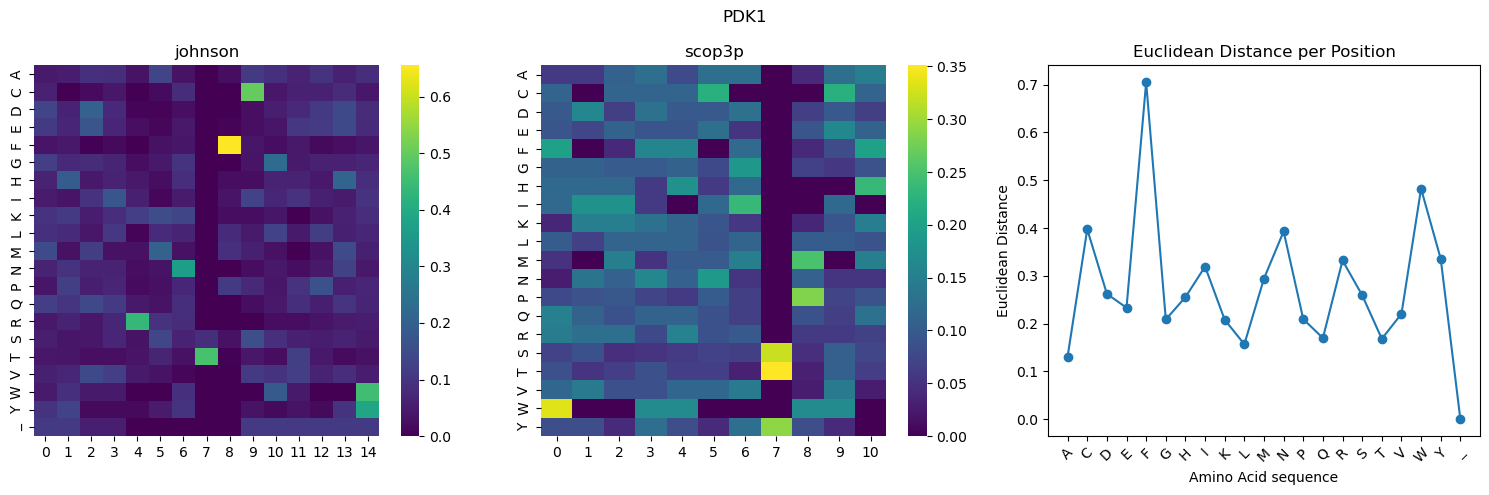

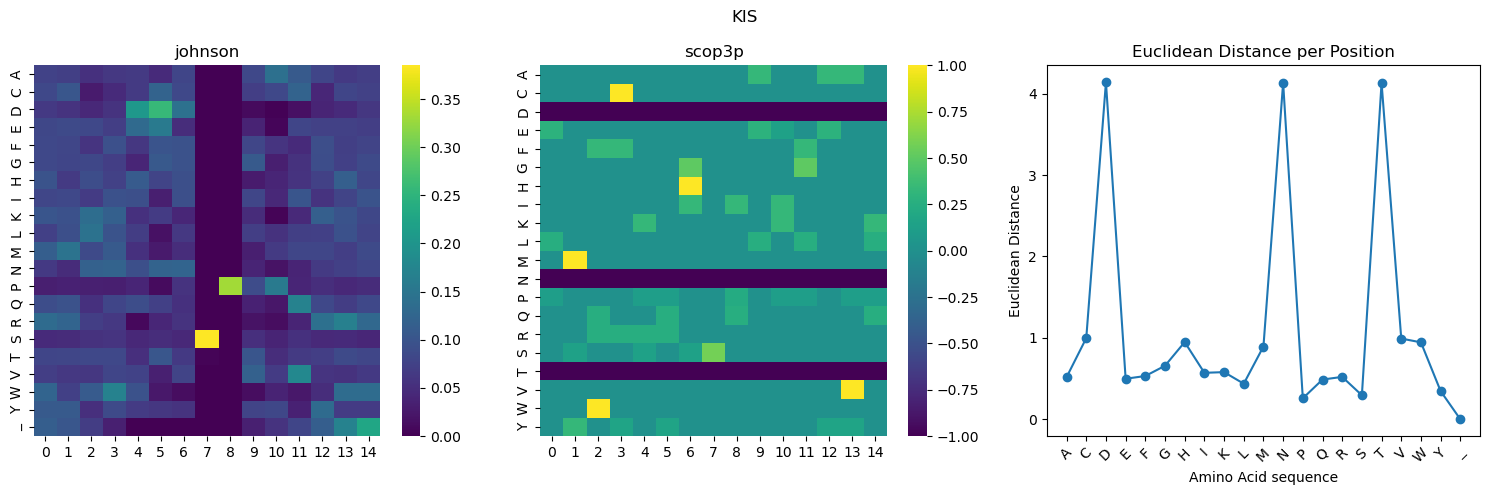

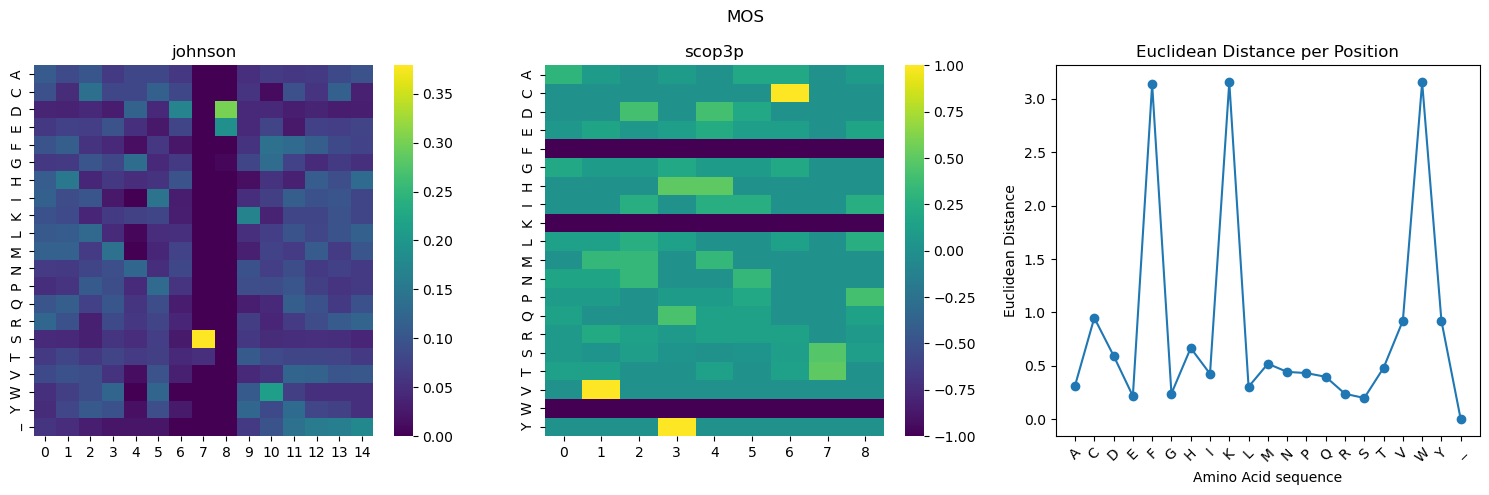

(None,)

In [70]:
plotting_pssm(rank1_pssm, scop3p_pssm, common_family, title1="johnson", title2="scop3p"), 